# Rihal Data Science Challenge

You are allowed to use any method in reading, loading, transforming the data. Additionally, you can use any model to predict the price of used cars.

**Make sure** you explain your approach at each step, and to evaluate your model. Finally, you must show the Mean Asbolute Error from your model's predictions when compared with the test dataset's prices.

---------------------------

## Imports

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_columns = 110

## Read Data

In [12]:
df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')

In [13]:
display(df_train.head())
display(df_test.head())

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,automatic,white,115000,2012,gasoline,gasoline,4.4,sedan,False,owned,all,True,32,104,146,20450.0
1,Mercedes-Benz,manual,other,500000,1999,diesel,diesel,2.2,sedan,False,owned,rear,False,7,9,147,2600.0
2,Fiat,manual,silver,210000,2002,gasoline,gasoline,1.2,hatchback,False,owned,front,True,16,7,27,2900.0
3,Mitsubishi,automatic,violet,294000,2000,diesel,diesel,3.2,suv,False,owned,all,True,10,2,48,7500.0
4,Opel,automatic,blue,244000,1998,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,10,116,2200.0


--------------

## **Train On Training Dataset**

Specify X and Y value from Dataframe

In [32]:
X=df_train.iloc[:, :-1].values
Y=df_train['price_usd'].values
print(X)
print(Y)


[['Volkswagen' 'automatic' 'black' ... 17 38 67]
 ['Renault' 'manual' 'brown' ... 9 3 100]
 ['Kia' 'automatic' 'brown' ... 5 10 91]
 ...
 ['Fiat' 'manual' 'red' ... 7 13 108]
 ['BMW' 'automatic' 'grey' ... 10 26 64]
 ['Volvo' 'automatic' 'other' ... 6 2 58]]
[13150.  7500. 12200. ...  2000.  5080.  6800.]


Encoding Categorical Data

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

colTransformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['manufacturer_name', 'transmission','color',
                                      'engine_fuel', 'engine_type', 'body_type',
                                      'has_warranty', 'ownership', 'type_of_drive',
                                      'is_exchangeable'])], remainder='passthrough'
    )

X_train=colTransformer.fit_transform(df_train)
print(X_train)

le=LabelEncoder()
Y_train=le.fit_transform(Y)
print(Y_train)

  (0, 48)	1.0
  (0, 55)	1.0
  (0, 57)	1.0
  (0, 69)	1.0
  (0, 75)	1.0
  (0, 88)	1.0
  (0, 90)	1.0
  (0, 94)	1.0
  (0, 96)	1.0
  (0, 99)	1.0
  (0, 100)	130000.0
  (0, 101)	2016.0
  (0, 102)	1.6
  (0, 103)	17.0
  (0, 104)	38.0
  (0, 105)	67.0
  (0, 106)	13150.0
  (1, 39)	1.0
  (1, 56)	1.0
  (1, 59)	1.0
  (1, 72)	1.0
  (1, 77)	1.0
  (1, 86)	1.0
  (1, 90)	1.0
  (1, 94)	1.0
  :	:
  (49998, 99)	1.0
  (49998, 100)	615000.0
  (49998, 101)	1998.0
  (49998, 102)	2.5
  (49998, 103)	10.0
  (49998, 104)	26.0
  (49998, 105)	64.0
  (49998, 106)	5080.0
  (49999, 49)	1.0
  (49999, 55)	1.0
  (49999, 63)	1.0
  (49999, 69)	1.0
  (49999, 75)	1.0
  (49999, 86)	1.0
  (49999, 90)	1.0
  (49999, 94)	1.0
  (49999, 96)	1.0
  (49999, 99)	1.0
  (49999, 100)	485000.0
  (49999, 101)	2002.0
  (49999, 102)	2.4
  (49999, 103)	6.0
  (49999, 104)	2.0
  (49999, 105)	58.0
  (49999, 106)	6800.0
[1586 1185 1527 ...  540  964 1123]


Traing XGBOOST on the Training Set of the 'train.csv' Dataset

In [34]:
from xgboost import XGBRFRegressor
regressor=XGBRFRegressor()
regressor.fit(X_train, Y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

Visualizing Train Prices on Training Set


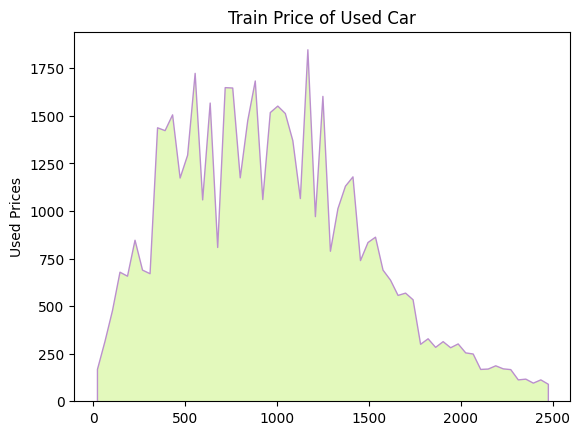

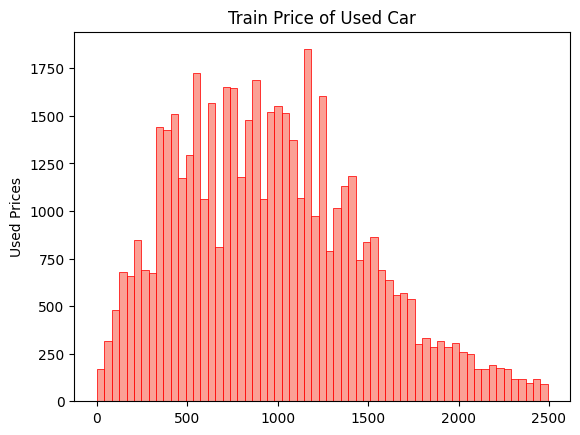

In [35]:
from matplotlib import pyplot as plt

trainSet=sns.histplot(Y_train,element='poly', color='#DAF7A6', edgecolor='#BB8FCE')
plt.title('Train Price of Used Car')
plt.ylabel('Used Prices')
plt.show()

trainSet=sns.histplot(Y_train, color='salmon', edgecolor='red')
plt.title('Train Price of Used Car')
plt.ylabel('Used Prices')
plt.show()

# **Test, Evaluate Performance and Predict Future Price**

Specify the X and Y values f Testing Dataset

In [36]:
Xt=df_test.iloc[:, :-1].values
Yt=df_test['price_usd'].values
print(Xt)
print(Yt)

[['BMW' 'automatic' 'white' ... 32 104 146]
 ['Mercedes-Benz' 'manual' 'other' ... 7 9 147]
 ['Fiat' 'manual' 'silver' ... 16 7 27]
 ...
 ['Volkswagen' 'manual' 'white' ... 6 1 35]
 ['Audi' 'manual' 'grey' ... 7 28 115]
 ['Volkswagen' 'manual' 'red' ... 9 2 15]]
[20450.  2600.  2900. ...  1100.  6300.  1550.]


Encoding Categorical Data to Transformation on Testing Dataset

In [37]:
X_test= colTransformer.transform(df_test)
print(X_test)


Y_test=le.fit_transform(Yt)
print(Y_test)

  (0, 3)	1.0
  (0, 55)	1.0
  (0, 67)	1.0
  (0, 72)	1.0
  (0, 77)	1.0
  (0, 86)	1.0
  (0, 90)	1.0
  (0, 94)	1.0
  (0, 95)	1.0
  (0, 99)	1.0
  (0, 100)	115000.0
  (0, 101)	2012.0
  (0, 102)	4.4
  (0, 103)	32.0
  (0, 104)	104.0
  (0, 105)	146.0
  (0, 106)	20450.0
  (1, 31)	1.0
  (1, 56)	1.0
  (1, 63)	1.0
  (1, 69)	1.0
  (1, 75)	1.0
  (1, 86)	1.0
  (1, 90)	1.0
  (1, 94)	1.0
  :	:
  (26998, 98)	1.0
  (26998, 100)	275000.0
  (26998, 101)	2006.0
  (26998, 102)	2.0
  (26998, 103)	7.0
  (26998, 104)	28.0
  (26998, 105)	115.0
  (26998, 106)	6300.0
  (26999, 48)	1.0
  (26999, 56)	1.0
  (26999, 64)	1.0
  (26999, 69)	1.0
  (26999, 75)	1.0
  (26999, 80)	1.0
  (26999, 90)	1.0
  (26999, 94)	1.0
  (26999, 96)	1.0
  (26999, 98)	1.0
  (26999, 100)	500000.0
  (26999, 101)	1991.0
  (26999, 102)	1.9
  (26999, 103)	9.0
  (26999, 104)	2.0
  (26999, 105)	15.0
  (26999, 106)	1550.0
[1644  507  553 ...  278  881  361]


Test the Performance and Predic Future Price of Used Car using XGBOOST Model

In [38]:
# Predict the futre prices
y_predict=regressor.predict(X_test)
print(y_predict)

[1986.5675   623.9203   694.45056 ...  365.58905 1073.0422   445.214  ]


Mean Absolute Error to evaluate the performance between Test set of prices and predic pricces


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

errors_Predication = mean_absolute_error(Y_test, y_predict)
mean_Squared_Error_Prediction = mean_squared_error(Y_test, y_predict)

#To compare how the prediction prices match the actual prices by calculating the r2_squared
r2_Acurracy = r2_score(Y_test, y_predict)

print('Mean Absolute Error: ', errors_Predication)
print('Mean Squared Error: ', mean_Squared_Error_Prediction)

print('r2-Squared: ', r2_Acurracy)


Mean Absolute Error:  177.36908049548114
Mean Squared Error:  38504.05470625591
r2-Squared:  0.7873829278866098


K-Fold Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=regressor, X=X_test, y=Y_test, cv=10)
print('Accuracy:', accuracies)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))


Accuracy: [0.99968831 0.99964464 0.99970815 0.99968969 0.99963826 0.99966346
 0.9996788  0.99967811 0.99963263 0.99960191]
Accuracy: 99.97%


Visualization Test on Testing Dataset

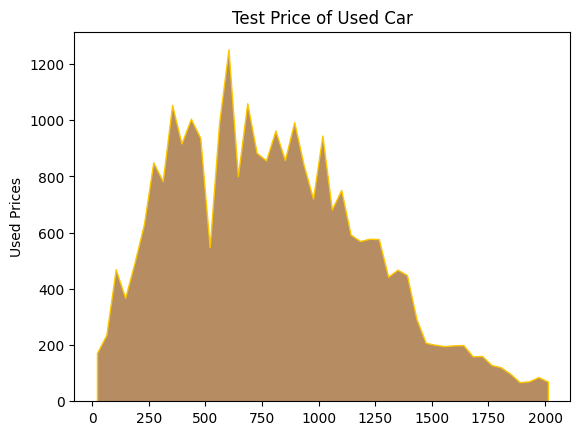

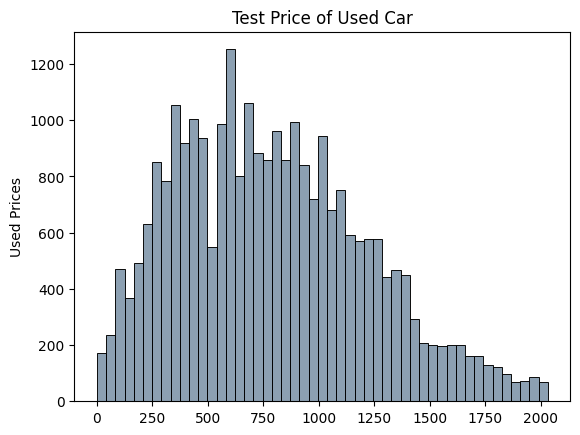

In [41]:
from matplotlib import pyplot as plt

trainSet=sns.histplot(Y_test,element='poly', color='#9e662e', edgecolor='#fcc700')
plt.title('Test Price of Used Car')
plt.ylabel('Used Prices')
plt.show()

trainSet=sns.histplot(Y_test, color='#668099', edgecolor='black')
plt.title('Test Price of Used Car')
plt.ylabel('Used Prices')
plt.show()



Visualizing Predict Price of Car Used

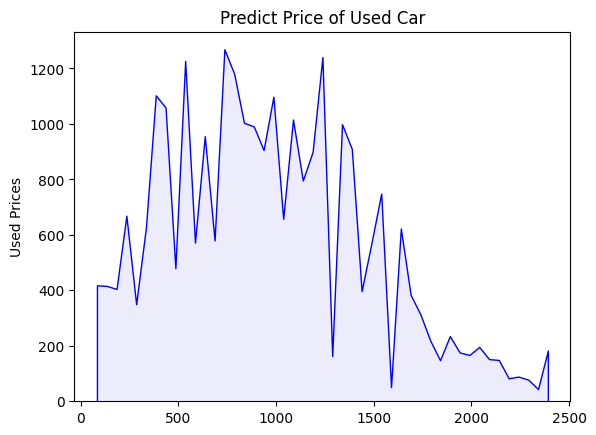

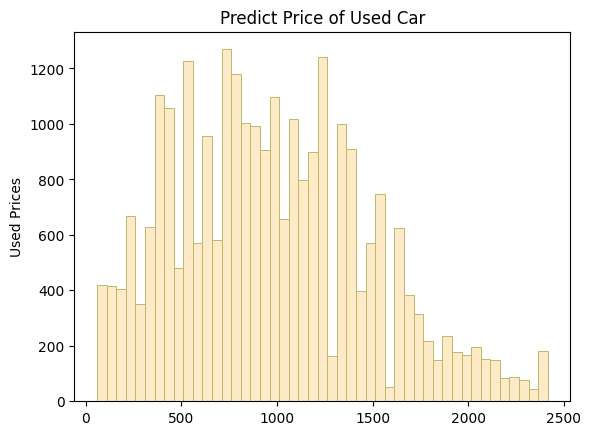

In [42]:
trainSet=sns.histplot(y_predict,element='poly', color='#E6E6FA', edgecolor='blue')
plt.title('Predict Price of Used Car')
plt.ylabel('Used Prices')
plt.show()

trainSet=sns.histplot(y_predict, color='#FFE4B5', edgecolor='#BDB76B')
plt.title('Predict Price of Used Car')
plt.ylabel('Used Prices')
plt.show()